In [2]:
import numpy as np

from gym_guppy.envs import GuppyEnv
from gym_guppy import TurnBoostRobot
from gym_guppy.tools.math import row_norm


In [3]:
class TestEnv(GuppyEnv):
    world_size = world_width, world_height = 100., 100.
    def _reset(self):
        self._add_robot(TurnBoostRobot(world=self.world,
                                       world_bounds=self.world_bounds,
                                       position=np.array([.0, .0]),
                                       orientation=.0))
        # self._add_robot(GoToRobot(world=self.world,
        #                           world_bounds=self.world_bounds,
        #                           position=np.array([.0, .0]),
        #                           orientation=.0))
        # self.robot.set_linear_gains(p=2., d=.0)
        # self.robot.set_angular_gains(p=1., d=.001)

env = TestEnv()

/Users/gregor/Applications/miniconda3/envs/nemo_ray/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [4]:
def execute_action_list(action_list):
    observations = [env.reset()]
    for a in action_list:
        observations.append(env.step(a)[0])
        
    return np.asarray(observations).squeeze()

def compute_displacement(observations):
    displacement = np.diff(observations, axis=0)
    norm = row_norm(displacement[:, :2])
    return np.c_[displacement[:, :2], norm, displacement[:, 2]]

def check_actions_in_action_space(action_list):
    failed = False
    for a in action_list:
        a = np.atleast_2d(a)
        if not env.action_space.contains(a):
            print(a, " is not in env's action_space.")
            failed = True
    if not failed:
        print("all actions in env's action_space")

In [5]:
print("action_space: ", env.action_space )
print("lower bounds: ", env.action_space.low)
print("upper bounds: ", env.action_space.high)

action_space:  Box(1, 2)
lower bounds:  [[-3.14159274  0.        ]]
upper bounds:  [[3.14159274 0.5       ]]


In [6]:
action_list = np.array([[.0, .015]])
check_actions_in_action_space(action_list)
observations = execute_action_list(action_list)
displacement = compute_displacement(observations)

all actions in env's action_space


In [7]:
observations

array([[0.        , 0.        , 0.        ],
       [0.56249996, 0.        , 0.        ]])

In [8]:
displacement


array([[0.56249996, 0.        , 0.56249996, 0.        ]])

Learn mapping from boost to distance (and constant velocity)


In [64]:
n_samples = 250
max_boost = .003
# boost_samples = np.random.uniform(.0, max_boost, n_samples)
boost_samples = np.random.wald(0.0002, 0.05, n_samples)
# boost_samples = np.ones(n_samples) * max_boost
action_samples = np.c_[np.zeros(n_samples),
                       boost_samples]
observations = execute_action_list(action_samples)
displacement = compute_displacement(observations)

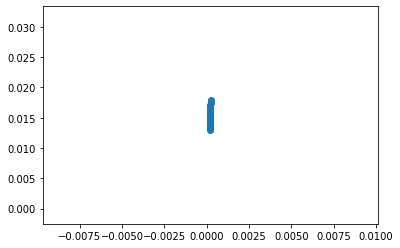

In [65]:
import matplotlib.pyplot as plt
plt.scatter(action_samples[:, 1], displacement[:, 2] * 2)